# Lab 01 - Introduction

In [1]:
import skimage
import matplotlib.pyplot as plt
import glob
import numpy as np

## Reading Images

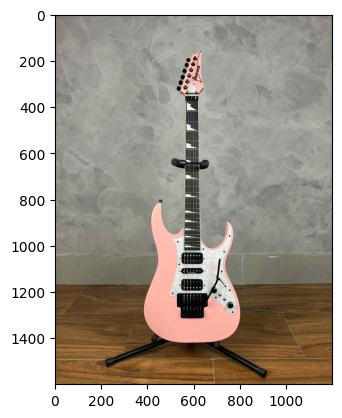

In [2]:
img = skimage.io.imread("./images/guitar/1.jpeg")

plt.imshow(img)
plt.show()

### Image Dimensions

In [3]:
print("Image Dimensions:")

rows = len(img)
cols = len(img[0])

print(f"{cols} x {rows} pixels")

Image Dimensions:
1200 x 1600 pixels


## Grayscale Conversion

The rgb values can be converted into a grayscale using the formula:

$gray = 0.2125r + 0.7154g + 0.0721b$


### Using SKImage

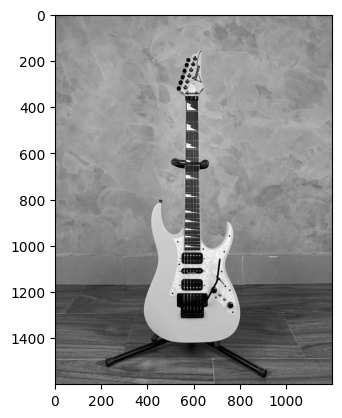

In [4]:
img_gray = skimage.color.rgb2gray(img)

plt.imshow(img_gray, cmap="gray")
plt.show()

### By Myself

Question: Why is it slower?

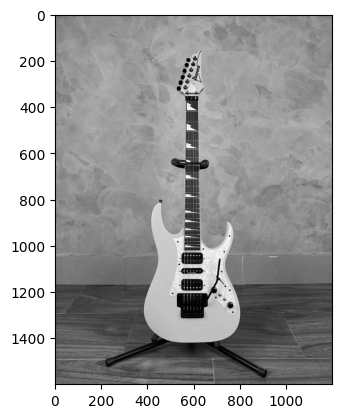

In [5]:
def gray_value(r: int, g: int, b: int) -> int:
    return int(0.2125*r + 0.7154*g + 0.0721*b)

def rgb_to_gray(img: list) -> list:
    gray_image = [[gray_value(pixel[0], pixel[1], pixel[2]) for pixel in row] for row in img]
    
    return gray_image
    
    
img_gray = rgb_to_gray(img)

plt.imshow(img_gray, cmap="gray")
plt.show()

## Plotting as a signal

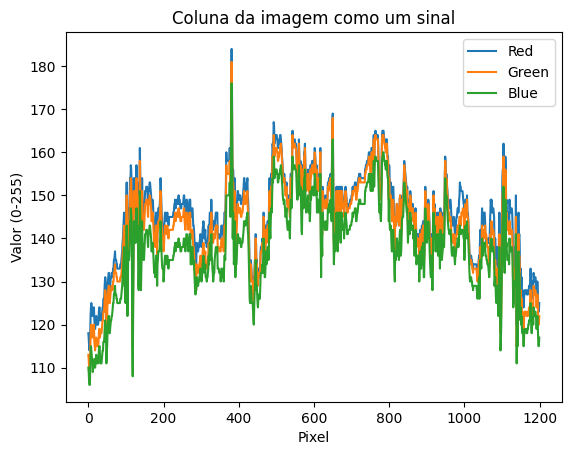

In [6]:
col = img[0]

plt.plot(col, label=["Red", "Green", "Blue"])
plt.legend(loc="upper right")
plt.xlabel("Pixel")
plt.ylabel("Valor (0-255)")
plt.title("Coluna da imagem como um sinal")
plt.show()

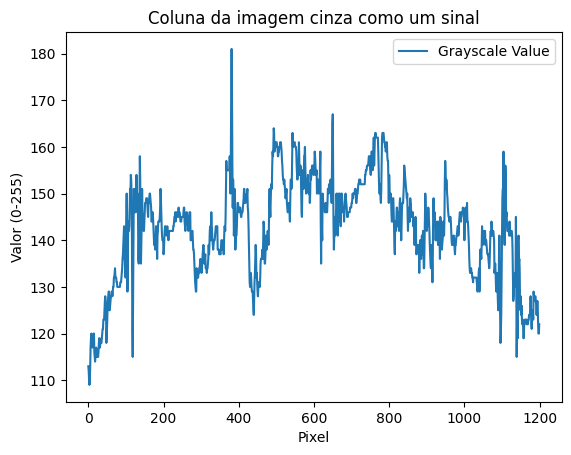

In [7]:
col = img_gray[0]

plt.plot(col, label="Grayscale Value")
plt.legend(loc="upper right")
plt.xlabel("Pixel")
plt.ylabel("Valor (0-255)")
plt.title("Coluna da imagem cinza como um sinal")
plt.show()

## Reading a list of images

Using glob to get all files in a path

Found 4 images on the directory


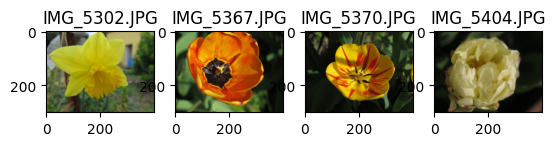

In [8]:
flowers = glob.glob("./images/flowers/*.jpg")

n = len(flowers)

print(f"Found {n} images on the directory")

fig, axs = plt.subplots(1, n)
for i in range(n):
    
    tmp = skimage.io.imread(flowers[i])
    
    #TODO: Check operational system to use \ or /
    title = flowers[i].split("\\")[-1]
    
    axs[i].imshow(tmp)
    axs[i].set_title(title)


## Creating a artificial image

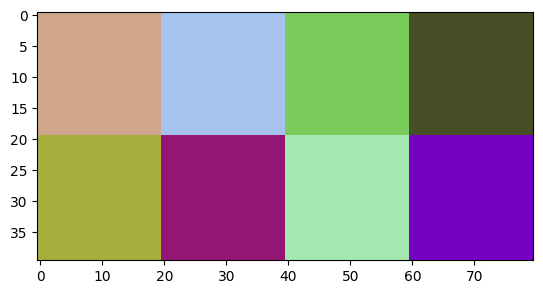

In [40]:
square_size = 20

rows = 2
cols = 4

artificial_image = np.zeros((square_size*rows,square_size*cols,3), dtype=int)

for row in range(rows):
    for col in range(cols):
        #generating a random color
        color = np.random.randint(256, size=3) #array of size 3 with integers variating from 0 to 255
        # print(color)
        
        for i in range(row*square_size, (row+1)*square_size):
            for j in range(col*square_size, (col+1)*square_size):
                for k in range(3):    
                    artificial_image[i,j,k] = color[k]        
                
        

plt.imshow(artificial_image)
plt.show()

## Image Intensity Range

- Display the image hdfs.tiff, corresponding to a part of the sky in the southern hemisphere. You should only observe a single star.

- What is the dynamic of this image (i.e. the minimum and maximum values of the intensities)?

- Adjust the intensity range with the arguments vmin and vmax of the function matplotlib.pyplot.imshow to observe other objects, most of them being galaxies.

- Try another colormap (argument cmap).

625722


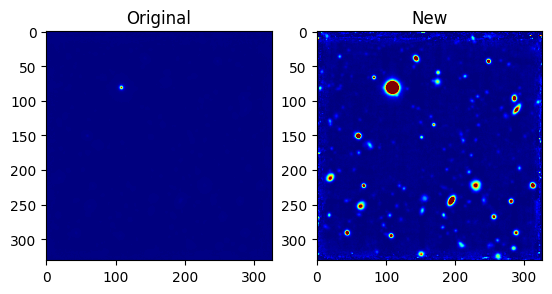

In [87]:
img = skimage.io.imread("./images/hdfs.tiff")

mins = []
for i in img:
    mins.append(min(i))

print(min(mins))
      
fig, axs = plt.subplots(1, 2)

axs[0].imshow(img, cmap='jet')
axs[0].set_title("Original")

axs[1].imshow(img, cmap='jet', vmin=3000000, vmax=6000000)
axs[1].set_title("New")

plt.show()


## Segmentation by Histogram Threshold

- Load the image santamonica.jpg and convert it to grayscale.

- Display its histogram with matplotlib.pyplot.hist, after having vectorized the image with numpy.ravel.

- Try different bin number and discuss the result: what do you observe?

- Choose a suitable threshold to segment the image into two classes. To perform thresholding, the easiest way is to display the image
```
f > threshold

```
- where f is the image to threshold and threshold is, well… the threshold value.

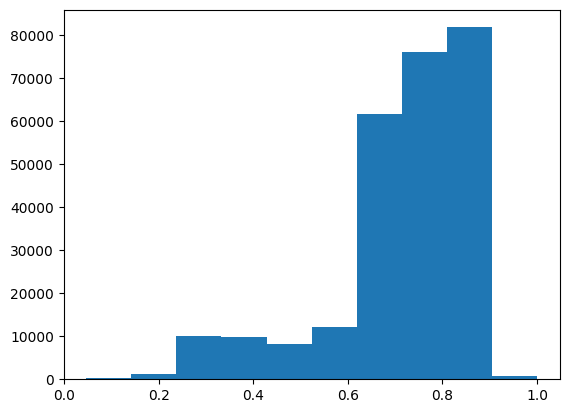

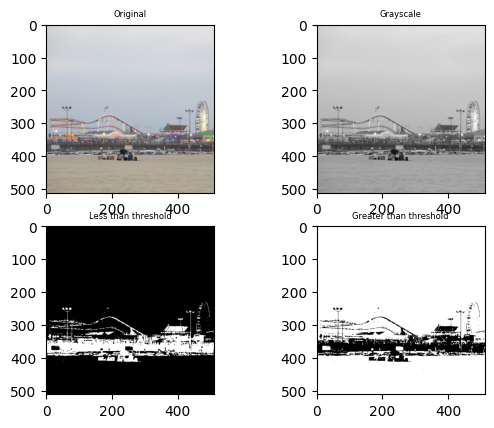

In [115]:
THRESHOLD = .5


img = skimage.io.imread("./images/santamonica.jpg")
img_gray = skimage.color.rgb2gray(img)

img_arr = np.ravel(img_gray)
plt.hist(img_arr)

plt.show()

fig, axs = plt.subplots(2, 2)

fontsize=6

axs[0, 0].imshow(img)
axs[0, 0].set_title('Original', fontsize=fontsize)

axs[0, 1].imshow(img_gray, cmap='gray')
axs[0, 1].set_title('Grayscale', fontsize=fontsize)

axs[1, 0].imshow(img_gray < THRESHOLD, cmap='gray')
axs[1, 0].set_title('Less than threshold', fontsize=fontsize)


axs[1, 1].imshow(img_gray >= THRESHOLD, cmap='gray')
axs[1, 1].set_title('Greater than threshold', fontsize=fontsize)

plt.show()

## Contrast enhancement

- Display the image haze.png, after converting it to grayscale.

- Display its histogram. You will notice that the image is not very contrasted: what does that imply on the histogram?

- Multiply the image by a positive real: what happens on the image and its histogram? Adjust the intensity range of the image to be the same as the original image.

- Perform an histogram equalization (skimage.exposure.equalize_hist). Do you achieve the exercise goal?

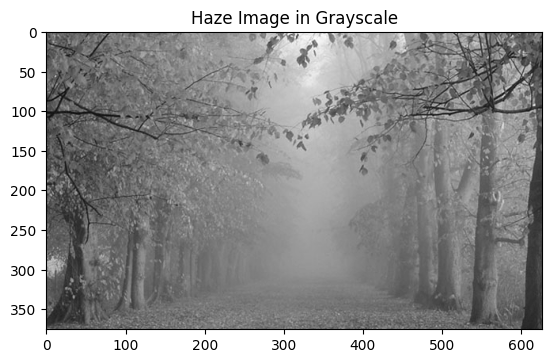

In [148]:
img = skimage.io.imread("./images/haze.png")
img_gray = skimage.color.rgb2gray(img)

plt.imshow(img_gray, cmap='gray')
plt.title("Haze Image in Grayscale")
plt.show()

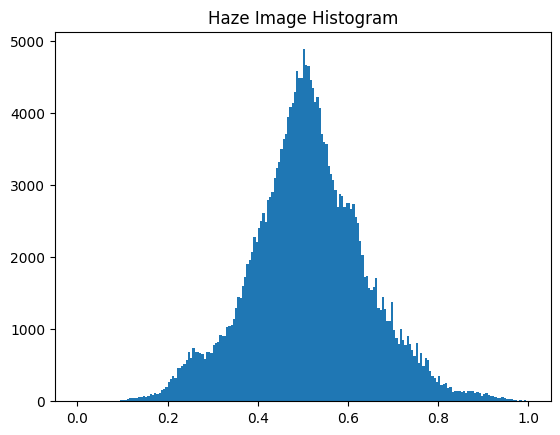

In [156]:
img_arr = np.ravel(img_gray)
plt.hist(img_arr, 200, range=(0.,1.))
plt.title('Haze Image Histogram')
plt.show()

The low contrast of the image implies on a concentrated histogram. :(

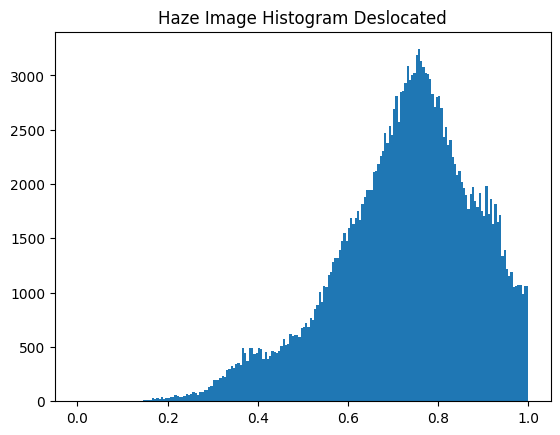

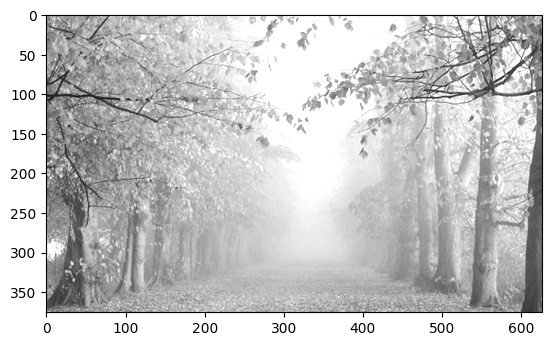

In [160]:
img_gray_deslocated = img_gray * 1.5

plt.hist(np.ravel(img_gray_deslocated), 200, range=(0.,1.))
plt.title('Haze Image Histogram Deslocated')

plt.show()

plt.imshow(img_gray_deslocated, cmap='gray', vmax=1)

plt.show()

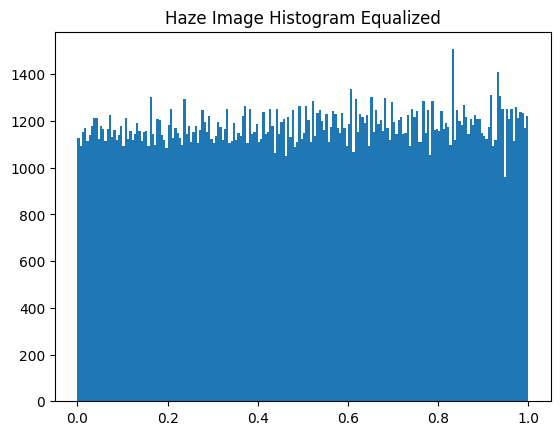

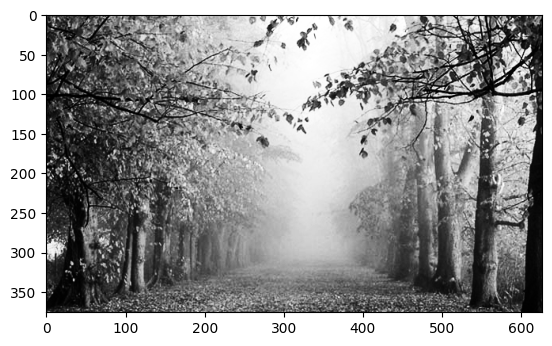

In [164]:
img_gray_equalized = skimage.exposure.equalize_hist(img_gray)

plt.hist(np.ravel(img_gray_equalized), 200, range=(0.,1.))
plt.title('Haze Image Histogram Equalized')

plt.show()

plt.imshow(img_gray_equalized, cmap='gray', vmax=1)

plt.show()